In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint
from scipy import stats
from datetime import datetime, timedelta
import os
os.chdir(r'C:\Users\Daniel\Documents\Johns Hopkins\Fall 2021\Stochastic Processes I\Project\Data 2')
files = os.listdir()
tickers = [s.replace('.csv', '') for s in files]

Collect and Organize All Stock Pricing Data

In [172]:
for i in range(len(files)):
    os.chdir(r'C:\Users\Daniel\Documents\Johns Hopkins\Fall 2021\Stochastic Processes I\Project\Data 2')

    data = pd.read_csv(files[i])
    data['Adj Close'].fillna(method = 'ffill',inplace= True)
    sd = np.std(data['Adj Close'])
    mean = np.mean(data['Adj Close'])
    data['Standardized Adj Close'] = ((data['Adj Close']) - mean)/sd
    os.chdir(r'C:\Users\Daniel\Documents\Johns Hopkins\Fall 2021\Stochastic Processes I\Project\Standardized Data')
    standard = data[['Date', 'Standardized Adj Close']]
    standard.rename(columns = {'Standardized Adj Close':tickers[i]}, inplace = True)
    standard.to_excel('Standard '+tickers[i]+'.xlsx', index=False)
    data['% Change'] = data['Adj Close'].pct_change()
    sdp = np.std(data['% Change'])
    meanp = np.mean(data['% Change'])
    data['Standardized % Change'] = ((data['% Change']) - meanp)/sdp
    os.chdir(r'C:\Users\Daniel\Documents\Johns Hopkins\Fall 2021\Stochastic Processes I\Project\Standardized Percent Data')
    standardp = data[['Date', 'Standardized % Change']]
    standard['Ticker'] = tickers[i]
    standardp.to_excel('Standard %'+tickers[i]+'.xlsx', index=False)

C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-172-5849e878cb2b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard['Ticker'] = tickers[i]


Combine All Pricing Records

In [169]:
os.chdir(r'C:\Users\Daniel\Documents\Johns Hopkins\Fall 2021\Stochastic Processes I\Project\Standardized Data')
sfiles = os.listdir()

df = pd.read_excel(sfiles[0])
for i in range(len(sfiles)-1):
    os.chdir(r'C:\Users\Daniel\Documents\Johns Hopkins\Fall 2021\Stochastic Processes I\Project\Standardized Data')
    data =pd.read_excel(sfiles[i+1])
    df = pd.merge(df,data, on ='Date')
    
os.chdir(r'C:\Users\Daniel\Documents\Johns Hopkins\Fall 2021\Stochastic Processes I\Project')
df.to_excel('Project Stock Data.xlsx')

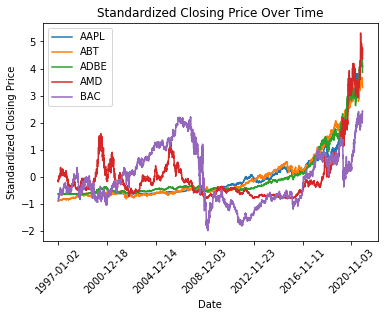

In [170]:
df.set_index('Date', inplace = True)
for i in range(5):
    df[tickers[i]].plot()
plt.xticks(rotation = 45) 
plt.title('Standardized Closing Price Over Time')
plt.ylabel('Standardized Closing Price')
plt.legend(loc = 'upper left')


Export % Change Data

In [173]:
os.chdir(r'C:\Users\Daniel\Documents\Johns Hopkins\Fall 2021\Stochastic Processes I\Project\Standardized Percent Data')
pfiles = os.listdir()

dfp = pd.read_excel(pfiles[0])
for i in range(len(pfiles)-1):
    os.chdir(r'C:\Users\Daniel\Documents\Johns Hopkins\Fall 2021\Stochastic Processes I\Project\Standardized Percent Data')
    datap =pd.read_excel(pfiles[i+1])
    dfp = pd.merge(dfp,datap, on ='Date')
    
os.chdir(r'C:\Users\Daniel\Documents\Johns Hopkins\Fall 2021\Stochastic Processes I\Project')
df.to_excel('Project Stock % Change Data.xlsx')

Finding A

In [205]:
X = df.transpose()
X

Date,1997-01-02,1997-01-03,1997-01-06,1997-01-07,1997-01-08,1997-01-09,1997-01-10,1997-01-13,1997-01-14,1997-01-15,...,2021-09-16,2021-09-17,2021-09-20,2021-09-21,2021-09-22,2021-09-23,2021-09-24,2021-09-27,2021-09-28,2021-09-29
AAPL,-0.622649,-0.622460,-0.623439,-0.623534,-0.623503,-0.623471,-0.623345,-0.623376,-0.623439,-0.623597,...,4.277839,4.187827,4.084957,4.101113,4.180904,4.213216,4.216183,4.165077,4.050997,4.081331
ABT,-0.895962,-0.890581,-0.893570,-0.888190,-0.891777,-0.889385,-0.884602,-0.885251,-0.880446,-0.881047,...,3.615708,3.591468,3.519866,3.529561,3.511661,3.535901,3.501219,3.359879,3.291260,3.318111
ADBE,-0.649552,-0.649070,-0.647743,-0.646175,-0.646054,-0.646898,-0.648949,-0.648828,-0.649142,-0.650833,...,4.549158,4.465474,4.361638,4.397851,4.241900,4.279372,4.215370,4.065323,3.869459,3.861035
AMD,-0.177930,-0.155090,-0.142039,-0.106149,-0.132251,-0.168142,-0.161616,-0.128988,-0.037630,-0.008265,...,4.659226,4.537066,4.415430,4.481730,4.563169,4.655571,4.637300,4.760503,4.413863,4.352784
BAC,-0.878144,-0.860122,-0.858320,-0.856518,-0.822274,-0.813263,-0.793438,-0.798844,-0.744777,-0.766405,...,2.130878,2.136333,1.984688,1.986870,2.097058,2.266159,2.315253,2.437441,2.426532,2.416713
BRK-B,-1.221999,-1.219145,-1.218193,-1.219779,-1.222316,-1.219145,-1.219145,-1.218828,-1.212802,-1.212485,...,2.830377,2.818485,2.777893,2.761719,2.775832,2.840049,2.836085,2.865419,2.818961,2.826889
CSCO,-1.357200,-1.339151,-1.326845,-1.321923,-1.335049,-1.330127,-1.319462,-1.316180,-1.296491,-1.307976,...,2.822666,2.784215,2.707312,2.656845,2.677673,2.771398,2.774602,2.733748,2.677673,2.674468
CVX,-1.306266,-1.304596,-1.299588,-1.293745,-1.300423,-1.289571,-1.282058,-1.291240,-1.292075,-1.288736,...,1.399672,1.381570,1.317567,1.319829,1.410016,1.488242,1.505697,1.582307,1.594913,1.593944
DHR,-0.801193,-0.801770,-0.802155,-0.801193,-0.801193,-0.801193,-0.801770,-0.802155,-0.801578,-0.802924,...,4.751863,4.761061,4.753772,4.764012,4.754119,4.769740,4.760541,4.613012,4.403869,4.453715
DIS,-0.832370,-0.821587,-0.823024,-0.823743,-0.828870,-0.831030,-0.828870,-0.828150,-0.820950,-0.821670,...,2.965834,2.968802,2.857847,2.687991,2.744610,2.803968,2.798261,2.849857,2.764472,2.722465


In [253]:
stocks = df.columns.values
dates = X.columns.values

S = []
for j in range(len(stocks)):
    S.append(0)

one_over_T = 1/(len(dates))
for i in range(len(dates)):
    a = np.array(X[dates[i]])[np.newaxis]
    s = one_over_T *np.dot(a.T,a)
    S = S+s
S = np.matrix(S)
S

matrix([[1.        , 0.97342249, 0.97800685, ..., 0.59960192, 0.94082283,
         0.42711584],
        [0.97342249, 1.        , 0.97494637, ..., 0.69224434, 0.97320994,
         0.51619228],
        [0.97800685, 0.97494637, 1.        , ..., 0.58233353, 0.93568361,
         0.38104103],
        ...,
        [0.59960192, 0.69224434, 0.58233353, ..., 1.        , 0.72061224,
         0.86790481],
        [0.94082283, 0.97320994, 0.93568361, ..., 0.72061224, 1.        ,
         0.56594124],
        [0.42711584, 0.51619228, 0.38104103, ..., 0.86790481, 0.56594124,
         1.        ]])

In [254]:
S.shape

(34, 34)

In [255]:
S1 = []
for j in range(len(stocks)):
    S1.append(0)

one_over_T_minus_1 = 1/(len(dates)-1)
for i in range(len(dates)-1):
    a = np.array(X[dates[i]])[np.newaxis]
    b = np.array(X[dates[i+1]])[np.newaxis]
    s1 = one_over_T_minus_1  *np.dot(a.T,b)
    S1 = S1+s1
S1 = np.matrix(S1)
S1

matrix([[0.99852433, 0.97214235, 0.97655853, ..., 0.59888895, 0.93944234,
         0.42650755],
        [0.97253084, 0.99893624, 0.97401585, ..., 0.6915769 , 0.97219962,
         0.51554223],
        [0.97681521, 0.97376526, 0.99862962, ..., 0.58142662, 0.93446608,
         0.38034374],
        ...,
        [0.5991038 , 0.6917998 , 0.58206809, ..., 0.99900373, 0.71996346,
         0.86708757],
        [0.94027557, 0.97255072, 0.93505121, ..., 0.72006958, 0.99891791,
         0.56536027],
        [0.42694327, 0.51607527, 0.38097698, ..., 0.86761848, 0.56562468,
         0.99918216]])

In [256]:
S1.shape

(34, 34)

In [257]:
A= np.dot(np.linalg.inv(S),S1.T)

In [258]:
S1

matrix([[0.99852433, 0.97214235, 0.97655853, ..., 0.59888895, 0.93944234,
         0.42650755],
        [0.97253084, 0.99893624, 0.97401585, ..., 0.6915769 , 0.97219962,
         0.51554223],
        [0.97681521, 0.97376526, 0.99862962, ..., 0.58142662, 0.93446608,
         0.38034374],
        ...,
        [0.5991038 , 0.6917998 , 0.58206809, ..., 0.99900373, 0.71996346,
         0.86708757],
        [0.94027557, 0.97255072, 0.93505121, ..., 0.72006958, 0.99891791,
         0.56536027],
        [0.42694327, 0.51607527, 0.38097698, ..., 0.86761848, 0.56562468,
         0.99918216]])

Finding Results for A^T*X_1

In [285]:
differences = pd.DataFrame()
for i in range(len(dates)-1):
    
    differences[dates[i+1]] = np.array(np.dot(A.T,X.iloc[:, i].values)[0])[0] - X[dates[i+1]]
differences

,1997-01-03,1997-01-06,1997-01-07,1997-01-08,1997-01-09,1997-01-10,1997-01-13,1997-01-14,1997-01-15,1997-01-16,...,2021-09-16,2021-09-17,2021-09-20,2021-09-21,2021-09-22,2021-09-23,2021-09-24,2021-09-27,2021-09-28,2021-09-29
AAPL,0.003610,0.004717,0.003808,0.003858,0.003710,0.003952,0.003982,0.004119,0.004737,0.005237,...,0.003457,0.086424,0.097621,-0.019580,-0.085431,-0.046721,-0.017143,0.038065,0.101296,-0.042552
ABT,0.000740,0.008664,0.000339,0.008982,0.003054,0.000698,0.005853,0.000491,0.005842,-0.004981,...,0.004495,0.028082,0.076833,-0.005148,0.020308,-0.023519,0.037098,0.145903,0.076876,-0.020044
ADBE,0.007737,0.006570,0.006272,0.007457,0.008585,0.009756,0.007406,0.007734,0.009500,0.007603,...,-0.036880,0.077702,0.109331,-0.028863,0.164634,-0.020884,0.081991,0.170613,0.218541,0.032437
AMD,-0.017723,-0.008255,-0.030871,0.030577,0.041161,-0.000578,-0.026729,-0.086055,-0.024582,0.000752,...,-0.048498,0.107118,0.100271,-0.087084,-0.105862,-0.123406,-0.007506,-0.147181,0.328274,0.053382
BAC,-0.016211,-0.000058,0.000462,-0.032067,-0.007265,-0.018053,0.007197,-0.052156,0.022810,-0.006103,...,-0.039427,-0.011993,0.140732,-0.011608,-0.123682,-0.192176,-0.072918,-0.144989,-0.017012,-0.019679
BRK-B,0.002957,0.004682,0.007152,0.008053,0.002410,0.005728,0.005164,-0.000426,0.005104,0.001767,...,0.013102,0.014240,0.043604,0.020082,-0.010926,-0.066252,0.002827,-0.029150,0.043111,-0.011996
CSCO,-0.009227,-0.003630,0.004005,0.021641,0.003942,-0.001992,0.005245,-0.010742,0.019640,0.007445,...,0.022771,0.045380,0.078336,0.054321,-0.019302,-0.103161,-0.012177,0.037086,0.053819,-0.001521
CVX,0.003031,-0.000385,-0.001308,0.011257,-0.006375,-0.002836,0.013422,0.005623,0.001635,0.005425,...,0.032088,0.021733,0.061737,-0.003753,-0.091881,-0.089303,-0.026480,-0.081242,-0.021501,-0.009300
DHR,0.006104,0.005563,0.004205,0.004922,0.005097,0.005599,0.005231,0.004204,0.006381,0.003996,...,0.009606,-0.020641,-0.004006,-0.023216,-0.003080,-0.023512,0.005369,0.145242,0.210757,-0.046283
DIS,-0.008311,0.004170,0.003159,0.007741,0.004591,0.000482,0.001744,-0.004307,0.004036,0.005290,...,0.019704,-0.007814,0.107242,0.169734,-0.052541,-0.057415,0.006287,-0.048780,0.085525,0.042670


In [323]:
graph_dates =dates[::630]
graph_dates

array(['1997-01-02', '1999-07-02', '2002-01-07', '2004-07-09',
       '2007-01-09', '2009-07-10', '2012-01-09', '2014-07-14',
       '2017-01-11', '2019-07-16'], dtype=object)

In [317]:
diffs =differences.transpose()
diffs

,AAPL,ABT,ADBE,AMD,BAC,BRK-B,CSCO,CVX,DHR,DIS,...,PFE,PG,QCOM,TMO,TXN,UNH,VZ,WFC,WMT,XOM
1997-01-03,0.003610,0.000740,0.007737,-0.017723,-0.016211,0.002957,-0.009227,0.003031,0.006104,-0.008311,...,-0.003354,0.001748,0.007022,-0.001310,0.001693,0.002828,0.007578,-0.001860,0.017247,0.007321
1997-01-06,0.004717,0.008664,0.006570,-0.008255,-0.000058,0.004682,-0.003630,-0.000385,0.005563,0.004170,...,0.014851,0.005803,0.007368,0.009070,0.007117,0.003797,0.007799,0.011263,0.018419,-0.000010
1997-01-07,0.003808,0.000339,0.006272,-0.030871,0.000462,0.007152,0.004005,-0.001308,0.004205,0.003159,...,0.000721,0.000082,0.005835,0.005835,0.006472,0.003742,0.017789,0.001676,-0.006089,0.007054
1997-01-08,0.003858,0.008982,0.007457,0.030577,-0.032067,0.008053,0.021641,0.011257,0.004922,0.007741,...,0.011602,0.017359,0.006495,0.002233,0.008972,0.004908,0.017033,0.003909,0.015107,0.013124
1997-01-09,0.003710,0.003054,0.008585,0.041161,-0.007265,0.002410,0.003942,-0.006375,0.005097,0.004591,...,0.018133,0.005985,0.005492,0.005828,0.011612,0.004186,0.001363,0.006240,0.009968,-0.013186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-23,-0.046721,-0.023519,-0.020884,-0.123406,-0.192176,-0.066252,-0.103161,-0.089303,-0.023512,-0.057415,...,-0.044712,-0.011525,-0.031723,-0.043902,-0.070564,0.010560,-0.025088,-0.068442,0.005730,-0.115930
2021-09-24,-0.017143,0.037098,0.081991,-0.007506,-0.072918,0.002827,-0.012177,-0.026480,0.005369,0.006287,...,0.015800,0.028971,0.002822,-0.039909,-0.049386,0.017449,0.004520,-0.022890,-0.003009,-0.043538
2021-09-27,0.038065,0.145903,0.170613,-0.147181,-0.144989,-0.029150,0.037086,-0.081242,0.145242,-0.048780,...,0.034725,0.074189,0.016014,0.101846,0.010312,0.029786,-0.006309,0.015636,0.042068,-0.104125
2021-09-28,0.101296,0.076876,0.218541,0.328274,-0.017012,0.043111,0.053819,-0.021501,0.210757,0.085525,...,0.053623,0.046406,0.127993,0.133045,0.143470,0.076548,0.024306,0.111081,0.069785,-0.049977


([<matplotlib.axis.XTick at 0x1c3e94077c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

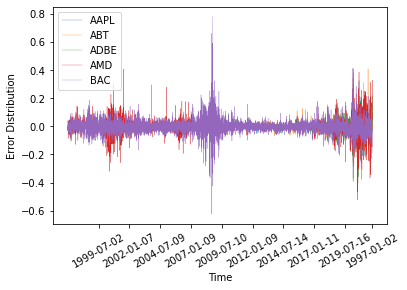

In [336]:
for i in range(5):
    plt.plot(diffs[stocks[i]], linewidth=.3, label = stocks[i])
    plt.xlabel('Time')
    plt.ylabel('Error Distribution')
    plt.legend()
plt.xticks(graph_dates, rotation=30)


Testing for Normality

In [362]:
alpha = 1e-3
passes = 0
fails = 0
for i in range(len(X)):
    k2, p = stats.normaltest(np.array(diffs[stocks[i]]))
    if p<alpha:
        fails = fails+1
    else:
        passes = passes+1
        
print(passes)
print(fails)


0
34


In [361]:
passes

0